HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?

# Objectives:

We need to find poorest countries from the dataset so that the NGO can help and eliminate the poverty from much needed countries.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#importing the dataset
data=pd.read_csv("Country-data.csv")

In [3]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
#check whether there is any null values in the dataframe
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The dataset contain 167 rows and 10 column and there are no missing values.

In [5]:
#what all variables and modules we have created or loaded into our computer memory
%whos

Variable   Type         Data/Info
---------------------------------
KMeans     type         <class 'sklearn.cluster._kmeans.KMeans'>
data       DataFrame                     country <...>\n[167 rows x 10 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [6]:
# the datatypes
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
x=data.iloc[:,1:10]
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# K-means clustering


In [8]:
#collecting the values of wcss for different centroids
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state =42)
    #once that instance is ready you can use it for fitting that model
    kmeans.fit(x)
    #calculate wcss with Kmeans.inertia_. Kmeans.inertia will give us wcss value. so we append that value in the list
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\vipin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


117459687469.07816
36528387934.3221
21710210039.75414
14610713446.535133
10655378083.862543
7655725089.094503
5353767457.732321
4258897193.751582
3228565265.69808
2669181672.0337477


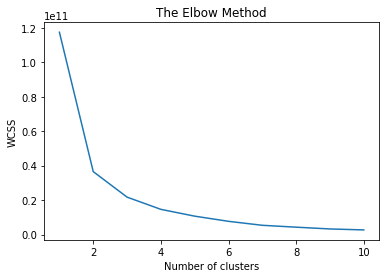

In [9]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

With the help of above Elbow chart we can decide the number of clusters as 3.

In [10]:
#creating the model
#k-means
kmeans =  KMeans(n_clusters = 3, init = 'k-means++',random_state =42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


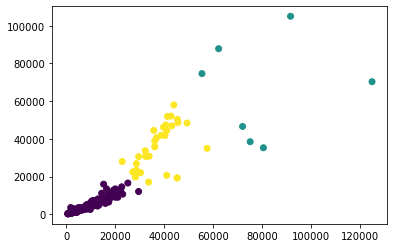

In [11]:
#scatter plotting
income=x["income"]
gdpp=x["gdpp"]
plt.scatter(income,gdpp,c=y_kmeans)
                    

In [12]:
#Adding Cluster as a feature to dataset
data['Cluster']=y_kmeans
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [13]:
# Number of countries in each cluster
data.Cluster.value_counts(ascending=True)

1      7
2     32
0    128
Name: Cluster, dtype: int64

# Hierarchical Clustering

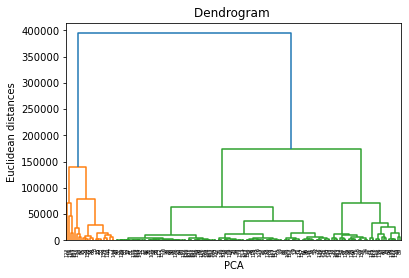

In [14]:
#using the dendrogram to find the optimal no of clusters
import scipy.cluster.hierarchy as sch
#creating an instance of dendrogram as x_pca with ward method
dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram ')
plt.xlabel('PCA')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
#  Here the optimum no clusters is 3

In [17]:
from sklearn.cluster import AgglomerativeClustering
#creating an instance of AgglomerativeClustering hc with no. of clusters as 3, euclidean distance and ward method 
hc = AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean',linkage ='ward')
y_hc = hc.fit_predict(x)

In [18]:
y_hc

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [21]:
d1=pd.DataFrame({"Labels":y_kmeans,"country":data["country"]})
d1

,Labels,country
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,0,Yemen


In [22]:
pd.crosstab(d1["Labels"],d1["country"])

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
Labels,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
